this script investigate the contribution of countries from production perspective. the analysis is motivated by the observation that the funding engagement of countries are decreasing except China. so how about the production engegement of countries. 

In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pubs_author_funder.csv"

In [3]:
pubs_author_funder=pd.read_csv(pubs_path)
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [5]:
cntry_author_frac = []
for index, row in pubs_author_funder.iterrows():
    year=row['year']
    author_cntrys=list(set(row['author_country']))
    n=len(author_cntrys)
    for c in author_cntrys:
        cntry_author_frac.append([c,1/n,year])

In [11]:
author_frac_df=pd.DataFrame(cntry_author_frac,columns=['cntry','cnt','year'])
author_frac_df.head()

,cntry,cnt,year
0,Turkey,1.0,2009
1,United States,0.5,2009
2,France,0.5,2009
3,Russia,1.0,2009
4,Spain,1.0,2009


In [12]:
n=10
topn=author_frac_df.groupby('cntry')[
    'cnt'].sum().sort_values(ascending=False).head(n).index.values

In [13]:
author_frac_df=author_frac_df.groupby(['cntry','year'])['cnt'].sum().reset_index()
author_frac_df.head()

,cntry,year,cnt
0,Afghanistan,2009,8.750000
1,Afghanistan,2010,15.566667
2,Afghanistan,2011,13.044444
3,Afghanistan,2012,19.566667
4,Afghanistan,2013,11.095833


In [14]:
def get_topn(cntry_ratio,topnlist):
    topn_df=cntry_ratio[topnlist].reset_index()
    topn_df=topn_df.melt(id_vars='year')
    return topn_df

In [15]:
author_frac_df=author_frac_df.pivot_table(index='year',columns='cntry',values='cnt')
author_frac_df=author_frac_df.div(author_frac_df.sum(axis=1), axis=0)
author_frac_df.head()

cntry,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2009,0.000008,0.000039,0.001019,1.439368e-06,0.000012,NaN,9.595787e-07,0.004731,0.000310,0.021385,...,0.222234,0.000343,0.000217,0.000005,0.000003,0.000800,0.000489,0.000058,0.000045,0.000085
2010,0.000014,0.000052,0.001034,1.638894e-06,0.000011,9.276756e-07,1.008663e-06,0.004897,0.000339,0.021673,...,0.218477,0.000323,0.000199,0.000005,0.000005,0.000725,0.000591,0.000057,0.000060,0.000090
2011,0.000011,0.000083,0.001030,8.722700e-07,0.000010,1.453783e-07,2.907567e-07,0.004865,0.000320,0.022030,...,0.211979,0.000379,0.000204,0.000006,0.000005,0.000601,0.000653,0.000075,0.000069,0.000083
2012,0.000016,0.000075,0.001097,1.377327e-06,0.000011,1.101862e-06,6.886637e-07,0.004711,0.000313,0.022510,...,0.206152,0.000326,0.000169,0.000006,0.000004,0.000537,0.000765,0.000069,0.000061,0.000086
2013,0.000009,0.000076,0.001172,2.021664e-06,0.000012,3.912899e-07,9.921994e-07,0.004614,0.000270,0.023266,...,0.200050,0.000334,0.000168,0.000005,0.000003,0.000532,0.000932,0.000066,0.000062,0.000098


In [22]:
topn_df=get_topn(author_frac_df, topn)
topn_df

,year,cntry,value
0,2009,United States,0.222234
1,2010,United States,0.218477
2,2011,United States,0.211979
3,2012,United States,0.206152
4,2013,United States,0.200050
...,...,...,...
95,2014,Canada,0.028780
96,2015,Canada,0.027992
97,2016,Canada,0.027062
98,2017,Canada,0.026657


In [23]:
topn_df[topn_df.cntry=='China']

,year,cntry,value
10,2009,China,0.103403
11,2010,China,0.109216
12,2011,China,0.119755
13,2012,China,0.132361
14,2013,China,0.147301
15,2014,China,0.164203
16,2015,China,0.177419
17,2016,China,0.187262
18,2017,China,0.200950
19,2018,China,0.219608


In [18]:
topn_df=topn_df[~topn_df.cntry.isin(['United States','China'])]

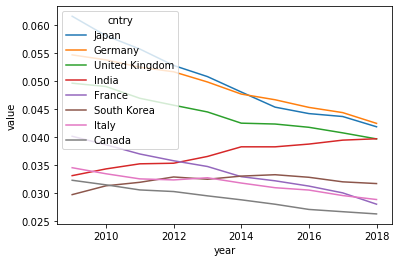

In [21]:
sns.lineplot(x='year',y='value',hue='cntry',data=topn_df,legend=True)